<span style='font-family:serif'>
    
# <center>$Machine   Learning   From   Scratch$</center>
# <center><span style='background:yellow'>Regressão Logística</span></center>
<center>$Rafael Pavan$</center>



<span style='font-family:serif'>
    
## 1. Introdução



A Regressão Logı́stica é um método de aprendizado supervisionado baseado em otimização, que tem como objetivo calcular a probabilidade de uma amostra pertencer a uma determinada classe, modelando o resultado através da função sigmoidal. É uma técnica tradicional de classificação que serve como base para outros métodos mais avançados, como as redes neurais e as máquinas de vetores de suporte.


In [192]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from random import randrange
rcParams['font.family'] = 'sans-serif'

<span style='font-family:serif'>
    
## 2. Importando e Pré-Visualizando os Dados
    
Os dados representam a classificação de 2 espécies de plantas com base na largura e comprimento de pétala.


In [193]:
df = pd.read_csv( 'dados.csv', sep=',')

In [194]:
df.head()

,largura_petala,comprimento_petala,classe
0,4.9,3.1,0
1,4.4,3.0,0
2,5.7,4.4,0
3,5.5,4.2,0
4,4.9,3.1,0


In [195]:
X = df.iloc[:, 0:-1].values

Y = df.iloc[:, -1].values #TARGET

print('X:', X[0:5,:])

print('Y:', Y[0:5])

X: [[4.9 3.1]
 [4.4 3. ]
 [5.7 4.4]
 [5.5 4.2]
 [4.9 3.1]]
Y: [0 0 0 0 0]


Agora, vamos criar uma função para plotar os dados.

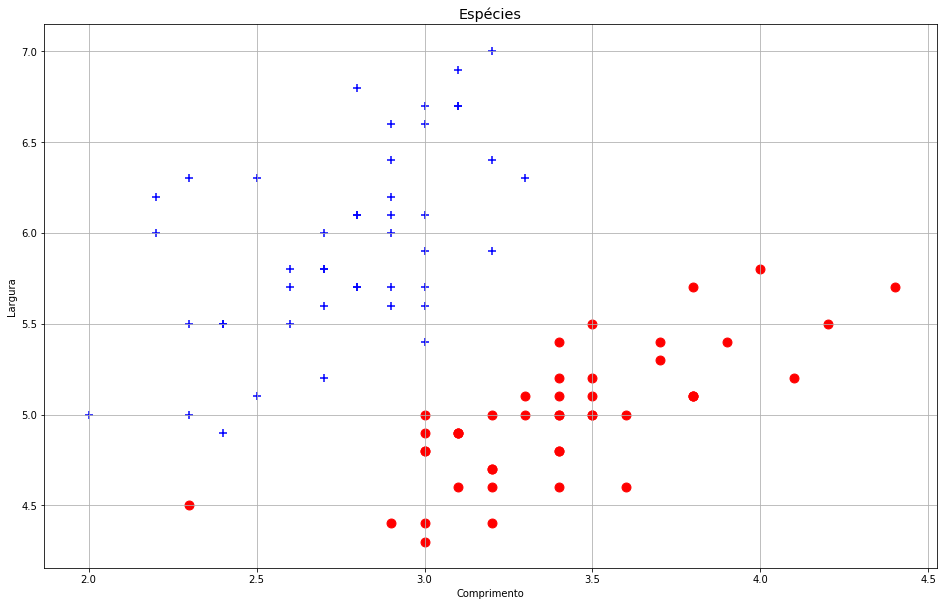

In [196]:
def visualizaDados(X,Y):

    """
    Função usada para plotar os dados.
    """
    plt.figure(figsize=(16,10))
    
    plt.scatter( X[Y==0,1], X[Y==0,0], label='A', marker='o', color='red', s=80) 
    plt.scatter( X[Y==1,1], X[Y==1,0], label='B', marker='+', color='blue', s=80) 
    plt.ylabel('Largura',fontsize='medium') 
    plt.xlabel('Comprimento',fontsize='medium') 
    plt.title("Espécies", fontsize='x-large')
    plt.grid()
    
visualizaDados(X,Y)

plt.show()

<span style='font-family:serif'>
    
## 2. Função Sigmoidal

A função sigmoide é uma função matemática de amplo uso em campos como a economia e a computação. Ela pode ser calculada por:
    
$$ g(z) = \frac{1}{1 + e^{-z}}. $$

In [197]:
def sigmoid(z):
    
    """
    Calcula a funcao sigmoidal  
    """
    
    if isinstance(z, int):
        
        g = 0
    
    else:
    
        g = np.zeros( z.shape );
     
    g = 1/(1+np.exp(-z))
    
    return g


<span style='font-family:serif'>
    
## 3. Cálculo da Hipótese (Previsão)

A hipótese $h_\theta(x)$ pode ser calculada pela expressão:

$$ h_\theta(x) = g \left(\theta^T x \right), $$

In [198]:
m, n = X.shape 

X = np.column_stack( (np.ones(m),X) )

theta = np.ones(n+1) 

In [199]:
def hipotese(X,theta):
            
    """
    
    Calcula a hipótese
    
    """
    
    hip = np.zeros(theta.shape)
    
    hip = sigmoid(np.dot(X, theta))
    
    return hip

In [200]:
hipotese(X,theta)

array([0.99987661, 0.99977518, 0.99998489, 0.99997746, 0.99987661,
       0.99984929, 0.99993228, 0.99995892, 0.99991728, 0.99992515,
       0.99989897, 0.99986363, 0.99983344, 0.99992515, 0.99986363,
       0.99990858, 0.99984929, 0.99993228, 0.99984929, 0.99990858,
       0.99996637, 0.99981593, 0.99986363, 0.99992515, 0.99997746,
       0.99987661, 0.99995892, 0.99975154, 0.99991728, 0.99991728,
       0.99993872, 0.99984929, 0.99997508, 0.99986363, 0.99991728,
       0.99994455, 0.99991728, 0.99987661, 0.99989897, 0.99998633,
       0.99989897, 0.9999796 , 0.99987661, 0.99975154, 0.99993872,
       0.99975154, 0.9999796 , 0.9999796 , 0.99993872, 0.99975154,
       0.99988835, 0.99997246, 0.99992515, 0.99997508, 0.99997508,
       0.99994983, 0.99997246, 0.99966465, 0.99994983, 0.99991728,
       0.99992515, 0.99994983, 0.99986363, 0.99994983, 0.99996637,
       0.99986363, 0.99994983, 0.99990858, 0.99993228, 0.99996637,
       0.99994455, 0.99997508, 0.99992515, 0.99981593, 0.99992

<span style='font-family:serif'>
    
## 4. Cálculo da Função de Custo

A função de custo, por sua vez, pode ser expressa por:
    
$$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left[-y^{(i)} \log\left(h_\theta(x^{(i)})\right) - \left(1 - y^{(i)}\right) \log\left(1 - h_\theta(x^{(i)})\right) \right], $$
    
E o gradiente desta funçao pode ser dado por:
    
$$\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} \left(h_\theta(x^{(i)}) - y^{(i)} \right).x_{j}^{(i)}.$$


In [201]:
def funcaoCustoEGrad(theta, X, Y):
    
    """
    
    Calcula o custo de usar theta como parametro da regressao logistica 
    para ajustar os dados de X e Y. 
    
    """
    
    m = len(Y) 
    
    J = 0;
    
    grad = np.zeros( len(theta) );
    
    eps = 1e-19
    
    n = X.shape[1] 
    
    J = (1 / m) * np.sum(-Y * np.log(eps+hipotese(X, theta)) - (1 - Y) * np.log(1 - hipotese(X, theta) + eps))
    
    for i in range(n):
        grad[i] = (1/m) * np.dot(X[:,i].T, hipotese(X, theta) - Y)
     
    return J,grad

In [202]:
funcaoCustoEGrad(theta, X, Y)

(4.6978698134732735, array([0.49990797, 2.49397187, 1.7030654 ]))

<span style='font-family:serif'>
    
## 5. Otimizando com o Scipy

Para utilização do Scipy, no método abaixo, deve-se passar a função de custo bem como a matriz jacobiana para se realizar a otimização. Como nossa expressão de custo é única, o nosso gradiente é equivalente ao jacobiano.

In [203]:
import scipy.optimize  

MaxIter = 500

theta = np.zeros(n+1)

# minimiza a funcao de custo
result = scipy.optimize.minimize(fun=funcaoCusto, x0=theta, args=(X, Y),  
                method='Newton-CG', jac=True, options={'maxiter': MaxIter, 'disp':True})

# coleta os thetas retornados pela função de minimização
theta = result.x

custo, grad = funcaoCusto(theta, X, Y) 

print('\nCusto encontrado: %f\n' %custo)

Optimization terminated successfully.
         Current function value: 0.000053
         Iterations: 24
         Function evaluations: 32
         Gradient evaluations: 293
         Hessian evaluations: 0

Custo encontrado: 0.000053



In [204]:
result

     fun: 5.2886856098221164e-05
     jac: array([ 1.67196137e-06, -1.38398944e-06,  3.09485820e-06])
 message: 'Optimization terminated successfully.'
    nfev: 32
    nhev: 0
     nit: 24
    njev: 293
  status: 0
 success: True
       x: array([-115.91809772,   43.19088836,  -36.90940586])

In [205]:
x_reg=np.array( [np.min(X[:,1])-2,  np.max(X[:,1])+2] )

y_reg=theta[0]+theta[1]*X[:,1] + theta[2]*X[:,2]

y_reg

array([-18.70190291, -36.60640651, -32.13141984, -33.38771634,
       -18.70190291,  36.74015479, -16.81745816,  36.81810371,
       -17.44560641,  26.92362954, -34.09381351, -31.03102117,
       -31.65916942, -21.136547  ,  33.04921421, -21.76469525,
       -19.33005116,  71.29286548, -35.35011001,  34.30551071,
        53.4663108 ,  12.08191828,  33.04921421,  34.93365896,
        62.73263673, -18.70190291, -19.25210225, -40.92549534,
       -25.45563583,  38.62459955,  19.54174836, -19.33005116,
        58.41354789,   9.01912594,   6.58448186,  -8.17928049,
        70.66471723, -42.73199118, -18.07375466,  68.30802206,
       -50.11387235,  59.04169614, -10.69187349, -32.91546592,
       -20.50839875,  15.14471061, -13.04856866,  59.04169614,
        43.57183663,   7.13468119,  25.66733304,  62.10448848,
       -29.14657642,  74.43360674,  34.38345962, -35.90030934,
        -9.98577632,  26.21753237,  28.17992604, -25.45563583,
        34.93365896, -35.90030934, -31.03102117,  44.19

<span style='font-family:serif'>
    
## 6. Visualizando os Dados

Como poderemos ver, a froteira de separação para este caso era linear.

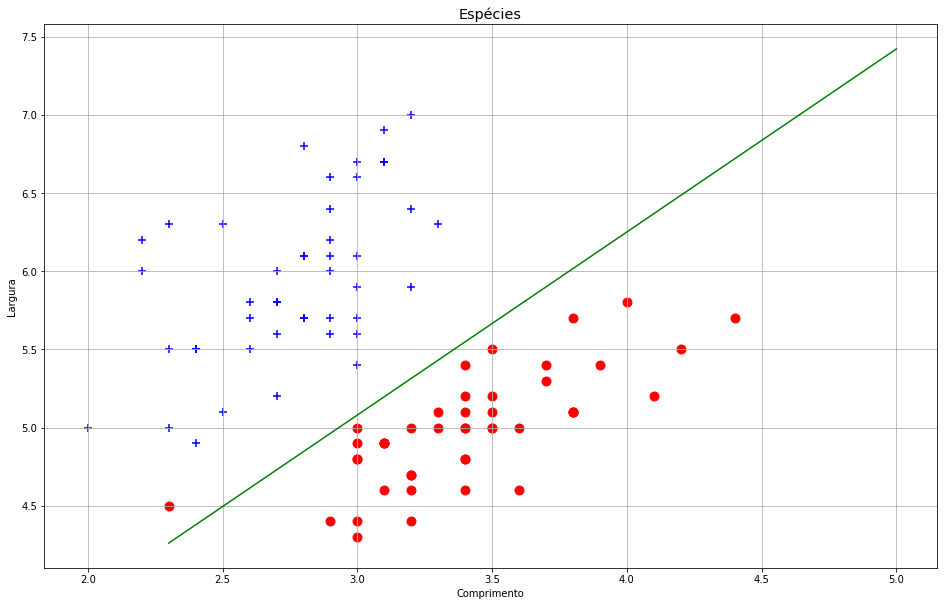

In [206]:
visualizaDados(X[:,1:],Y)


plot_x = np.array( [np.min(X[:,1]-2),  np.max(X[:,1]-2)] )
plot_y = np.array( (-1/theta[2])*(theta[1]*plot_x + -0.5*theta[0]) ) 

plt.plot( plot_x, plot_y, label = 'Regressor Linear', color='green', linestyle='-', linewidth=1.5) 



<span style='font-family:serif'>
    
## 7. Dados Não-Lineares e Regularização
    
Na maioria dos casos da vida real, os dados não são linearmente separáveis. 

In [207]:
df = pd.read_csv( 'dados2.csv', sep=',')

In [208]:
df.head()

,largura_petala,comprimento_petala,classe
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [209]:
X = df.iloc[:, 0:-1].values

Y = df.iloc[:, -1].values #TARGET

print('X:', X[0:5,:])

print('Y:', Y[0:5])

X: [[ 0.051267  0.69956 ]
 [-0.092742  0.68494 ]
 [-0.21371   0.69225 ]
 [-0.375     0.50219 ]
 [-0.51325   0.46564 ]]
Y: [1 1 1 1 1]


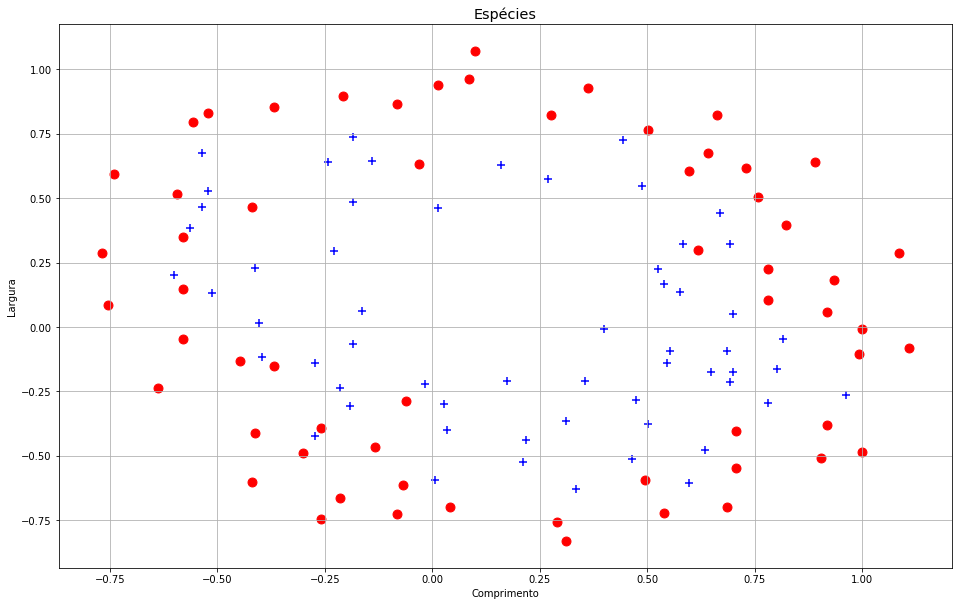

In [210]:
visualizaDados(X,Y)

plt.show()

Para realizar a regressão logística neste caso, teremos que transformar os atributos originais em atributos polinomiais.

In [213]:
def atributosPolinomiais(X1,X2):
    """
    Gera atributos polinomiais a partir dos atriburos
    originais da base. 
 
    Retorna um novo vetor de mais atributos:
    X1, X2, X1.^2, X2.^2, X1*X2, X1*X2.^2
 
    As entradas X1, X2 devem ser do mesmo tamanho.
    """
    
    grau=15
    
    if not isinstance(X1,  np.ndarray):
        X1 = np.array( [[X1]] )
        X2 = np.array( [[X2]] )
        
    out = np.ones( len(X1) )
    
    for i in range( 1,grau+1 ):
        for j in range( 0,i+1 ):
            out_temp = ( X1**(i-j) ) * (X2**j)
            
            out = np.column_stack( (out,out_temp) ) 
            
    return out

X_poli = atributosPolinomiais(X[:,0],X[:,1]) 

print('Dimensão dos atributos do novo conjunto de dados polinomiais: \n', X_poli.shape[1])


Dimensão dos atributos do novo conjunto de dados polinomiais: 
 136


Quando aumentamos o grau dos atributos, torna-se necessário adicionar um parâmetro de regularização a função de custo para evitar o overfitting dos dados. A regularização adiciona à função custo o valor dos parâmetros. Tal adição resulta na eliminação de parâmetros de pouca importância e, portanto, em um modelo mais convexo, do qual que se espera que seja mais representativo da realidade. 

$$ J(\theta) = \left[ \frac{1}{m} \sum_{i=1}^{m} \left[-y^{(i)} \log\left(h_\theta(x^{(i)})\right) - \left(1 - y^{(i)}\right) \log\left(1 - h_\theta(x^{(i)})\right) \right] \right] + \frac{\lambda}{2m} \sum_{j=1}^{n} \theta_{j}^2. $$

O gradiente da função de custo é um vetor no qual o $j-$ésimo elemento é definido como:

$$\frac{\partial J(\theta)}{\partial \theta_j}= 
\begin{cases}
    \displaystyle \frac{1}{m} \sum_{i=1}^{m} \left(h_\theta(x^{(i)}) - y^{(i)} \right).x_{j}^{(i)},& \text{se } j = 0\\
    \displaystyle \left(\frac{1}{m} \sum_{i=1}^{m} \left(h_\theta(x^{(i)}) - y^{(i)} \right).x_{j}^{(i)}\right) + \frac{\lambda}{m} \theta_j,              & \text{se } j \geq 0\\
\end{cases}
$$

In [214]:
def funcaoCustoRegEGrad(theta, X, Y, lambda_reg):

    """
    Calcula o custo de usar theta como parametro da regressao logistica 
    para ajustar os dados de X e Y. Computa tambem as derivadas parciais 
    para o custo com relacao ao parametro theta. 
    """
    
    m = len(Y) #numero de exemplos de treinamento

    J = 0
    grad = np.zeros( len(theta) )
    
    eps = 1e-15
    
    theta2 = theta[1:]
    
    J = (1 / m) * np.sum(-Y * np.log(eps+sigmoid(np.dot(X, theta))) - (1 - Y) * np.log(1 - sigmoid(np.dot(X, theta)) + eps))+((lambda_reg/(2*m))*np.sum(theta2*theta2))   
    
    for t in range(len(theta)):
        
        if t==0:
            
            grad[t] = (1/m) * np.dot(X[:,t].T, sigmoid(np.dot(X, theta)) - Y)
    
        else:
            grad[t] = ((1/m) * np.dot(X[:,t].T, sigmoid(np.dot(X, theta)) - Y))+(lambda_reg/m)*theta[t]
    
    
    return J, grad



m, n = X_poli.shape

theta = np.zeros(n)

lambda_reg = 1

custo, grad = funcaoCustoRegEGrad(theta, X_poli, Y, lambda_reg)

print('Custo encontrado para theta inicial (zeros): ',custo)

print('Vetor de Gradiente: ',grad)

Custo encontrado para theta inicial (zeros):  0.6931471805599437
Vetor de Gradiente:  [ 8.47457627e-03  1.87880932e-02  7.77711864e-05  5.03446395e-02
  1.15013308e-02  3.76648474e-02  1.83559872e-02  7.32393391e-03
  8.19244468e-03  2.34764889e-02  3.93486234e-02  2.23923907e-03
  1.28600503e-02  3.09593720e-03  3.93028171e-02  1.99707467e-02
  4.32983232e-03  3.38643902e-03  5.83822078e-03  4.47629067e-03
  3.10079849e-02  3.10312442e-02  1.09740238e-03  6.31570797e-03
  4.08503006e-04  7.26504316e-03  1.37646175e-03  3.87936363e-02
  1.99427086e-02  2.74239681e-03  2.32500787e-03  2.21859968e-03
  1.37054473e-03  4.59059364e-03  2.44887343e-03  3.45775396e-02
  2.58470812e-02  9.24073316e-04  3.56449986e-03  2.36431492e-04
  2.73345994e-03  1.41372690e-04  5.06220460e-03  7.44299593e-04
  3.91158180e-02  1.94460178e-02  2.03971305e-03  1.67313910e-03
  9.57374855e-04  8.28510751e-04  1.45754709e-03  5.55440822e-04
  3.80878101e-03  1.42922173e-03  3.74400380e-02  2.27382094e-02
  1.

<span style='font-family:serif'>
    
## 8. Regularização Fraca (0.00005)



In [215]:

lambda_reg = 0.00005

iteracoes = 50
theta = np.zeros(n) 

result = scipy.optimize.minimize(fun=funcaoCustoRegEGrad, x0=theta, args=(X_poli, Y, lambda_reg),  
                method='Newton-CG',jac=True, options={'maxiter': iteracoes, 'disp':True})

theta0 = result.x

custo, grad = funcaoCustoRegEGrad(theta, X_poli, Y, lambda_reg) 



         Current function value: 0.256254
         Iterations: 12
         Function evaluations: 14
         Gradient evaluations: 6876
         Hessian evaluations: 0


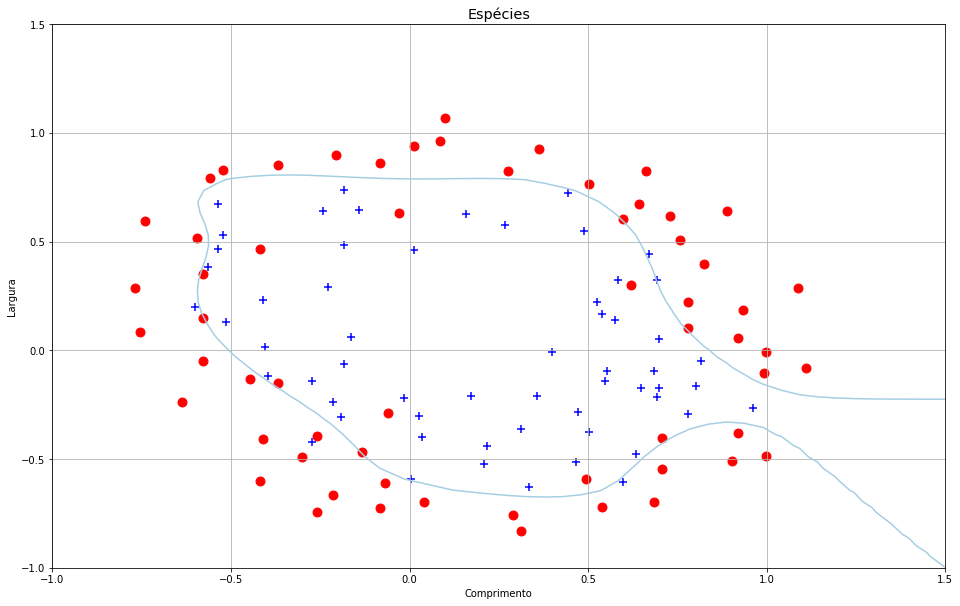

In [216]:
visualizaDados(X,Y)

u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)

z = np.zeros( [len(u), len(v)] )

for i in range( len(u) ):
    for j in range( len(v) ):
        z[i,j] = np.dot( atributosPolinomiais( u[i], v[j] ),theta0);

plt.contour(u, v, z, levels=[0], cmap=plt.cm.Paired)


plt.show()

<span style='font-family:serif'>
    
## 9. Regularização Forte (5)



Optimization terminated successfully.
         Current function value: 0.606138
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 46
         Hessian evaluations: 0


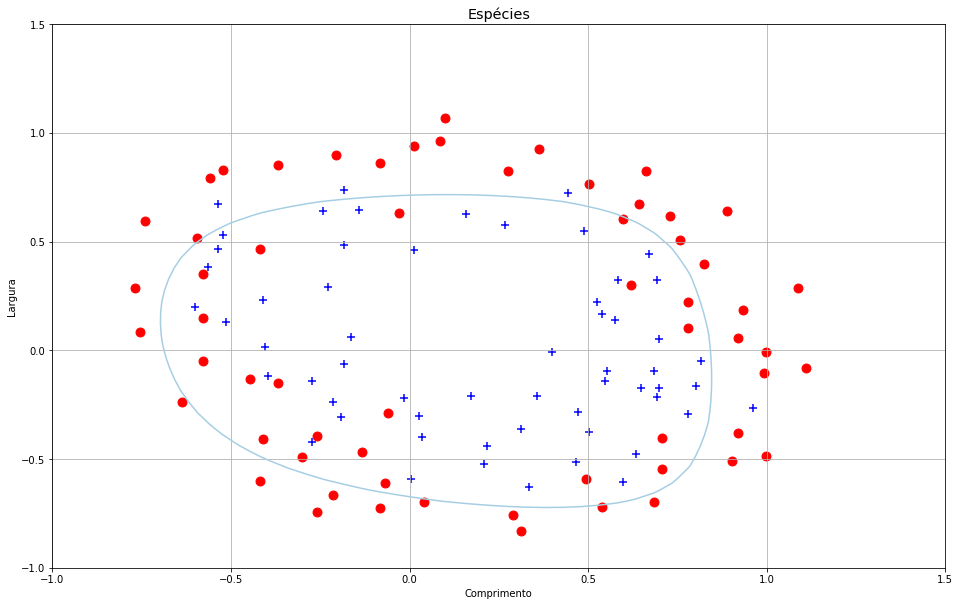

In [221]:
lambda_reg = 5

iteracoes = 50
theta = np.zeros(n) 

result = scipy.optimize.minimize(fun=funcaoCustoRegEGrad, x0=theta, args=(X_poli, Y, lambda_reg),  
                method='Newton-CG',jac=True, options={'maxiter': iteracoes, 'disp':True})

theta = result.x

custo, grad = funcaoCustoRegEGrad(theta, X_poli, Y, lambda_reg) 

visualizaDados(X,Y)

u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)

z = np.zeros( [len(u), len(v)] )

for i in range( len(u) ):
    for j in range( len(v) ):
        z[i,j] = np.dot( atributosPolinomiais( u[i], v[j] ),theta);

plt.contour(u, v, z, levels=[0], cmap=plt.cm.Paired)


plt.show()